<a href="https://colab.research.google.com/github/Abhishek3102/T20-WORLD-CUP-2024/blob/main/T20_World_Cup_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# kaggle datasets download -d buggynaman1801/t20-wc-matches

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/T20_WC_matches.csv")

In [ ]:
df.head(10)

,Unnamed: 0,matchId,matchNumber,teamA_shortName,teamB_shortName,matchResult,startDate,stage,venue
0,0,239603,Match 1,USA,CAN,USA beat Canada by 7 wickets,2024-06-02 06:00:00+05:30,Group,"Grand Prairie Cricket Stadium, Dallas"
1,1,239604,Match 2,WI,PNG,West Indies beat Papua New Guinea by 5 wickets,2024-06-02 20:00:00+05:30,Group,"Guyana National Stadium, Guyana"
2,2,239605,Match 3,NAM,OMA,Oman tied with Namibia (Namibia win Super Over...,2024-06-03 06:00:00+05:30,Group,"Kensington Oval, Bridgetown, Barbados"
3,3,239606,Match 4,SL,SA,South Africa beat Sri Lanka by 6 wickets,2024-06-03 20:00:00+05:30,Group,"Nassau County International Cricket Stadium, N..."
4,4,239607,Match 5,AFG,UGA,Afghanistan beat Uganda by 125 runs,2024-06-04 06:00:00+05:30,Group,"Guyana National Stadium, Guyana"
5,5,239608,Match 6,ENG,SCO,Match Abandoned,2024-06-04 20:00:00+05:30,Group,"Kensington Oval, Bridgetown, Barbados"
6,6,239609,Match 7,NED,NEP,Netherlands beat Nepal by 6 wickets,2024-06-04 21:00:00+05:30,Group,"Grand Prairie Cricket Stadium, Dallas"
7,7,239610,Match 8,IND,IRE,India beat Ireland by 8 wickets,2024-06-05 20:00:00+05:30,Group,"Nassau County International Cricket Stadium, N..."
8,8,239611,Match 9,PNG,UGA,Uganda beat Papua New Guinea by 3 wickets,2024-06-06 05:00:00+05:30,Group,"Guyana National Stadium, Guyana"
9,9,239612,Match 10,AUS,OMA,Australia beat Oman by 39 runs,2024-06-06 06:00:00+05:30,Group,"Kensington Oval, Bridgetown, Barbados"


In [ ]:
df = df.drop(columns='Unnamed: 0', axis=1)

In [ ]:
df.head(10)

,matchId,matchNumber,teamA_shortName,teamB_shortName,matchResult,startDate,stage,venue
0,239603,Match 1,USA,CAN,USA beat Canada by 7 wickets,2024-06-02 06:00:00+05:30,Group,"Grand Prairie Cricket Stadium, Dallas"
1,239604,Match 2,WI,PNG,West Indies beat Papua New Guinea by 5 wickets,2024-06-02 20:00:00+05:30,Group,"Guyana National Stadium, Guyana"
2,239605,Match 3,NAM,OMA,Oman tied with Namibia (Namibia win Super Over...,2024-06-03 06:00:00+05:30,Group,"Kensington Oval, Bridgetown, Barbados"
3,239606,Match 4,SL,SA,South Africa beat Sri Lanka by 6 wickets,2024-06-03 20:00:00+05:30,Group,"Nassau County International Cricket Stadium, N..."
4,239607,Match 5,AFG,UGA,Afghanistan beat Uganda by 125 runs,2024-06-04 06:00:00+05:30,Group,"Guyana National Stadium, Guyana"
5,239608,Match 6,ENG,SCO,Match Abandoned,2024-06-04 20:00:00+05:30,Group,"Kensington Oval, Bridgetown, Barbados"
6,239609,Match 7,NED,NEP,Netherlands beat Nepal by 6 wickets,2024-06-04 21:00:00+05:30,Group,"Grand Prairie Cricket Stadium, Dallas"
7,239610,Match 8,IND,IRE,India beat Ireland by 8 wickets,2024-06-05 20:00:00+05:30,Group,"Nassau County International Cricket Stadium, N..."
8,239611,Match 9,PNG,UGA,Uganda beat Papua New Guinea by 3 wickets,2024-06-06 05:00:00+05:30,Group,"Guyana National Stadium, Guyana"
9,239612,Match 10,AUS,OMA,Australia beat Oman by 39 runs,2024-06-06 06:00:00+05:30,Group,"Kensington Oval, Bridgetown, Barbados"


In [ ]:
df.tail()

,matchId,matchNumber,teamA_shortName,teamB_shortName,matchResult,startDate,stage,venue
50,239653,Super Eight - Match 11,AUS,IND,India beat Australia by 24 runs,2024-06-24 20:00:00+05:30,Super Eight,"Daren Sammy National Cricket Stadium, Gros Isl..."
51,239654,Super Eight - Match 12,AFG,BAN,Afghanistan beat Bangladesh by 8 runs (DLS met...,2024-06-25 06:00:00+05:30,Super Eight,"Arnos Vale Ground, Arnos Vale, St Vincent"
52,239655,1st Semi-Final,SA,AFG,South Africa beat Afghanistan by 9 wickets,2024-06-27 06:00:00+05:30,Semi Final,"Brian Lara Cricket Academy, Tarouba, Trinidad ..."
53,239656,2nd Semi-Final,IND,ENG,India beat England by 68 runs,2024-06-27 20:00:00+05:30,Semi Final,"Guyana National Stadium, Guyana"
54,239657,Final,SA,IND,India beat South Africa by 7 runs,2024-06-29 20:00:00+05:30,Final,"Kensington Oval, Bridgetown, Barbados"


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['matchId'].plot(kind='hist', bins=20, title='matchId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('matchNumber').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('teamA_shortName').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('teamB_shortName').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('matchResult').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='index', y='matchId', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('matchNumber')):
  _plot_series(series, series_name, i)
  fig.legend(title='matchNumber', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('teamA_shortName')):
  _plot_series(series, series_name, i)
  fig.legend(title='teamA_shortName', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('teamB_shortName')):
  _plot_series(series, series_name, i)
  fig.legend(title='teamB_shortName', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('matchResult')):
  _plot_series(series, series_name, i)
  fig.legend(title='matchResult', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_11['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['matchId'].plot(kind='line', figsize=(8, 4), title='matchId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['teamA_shortName'].value_counts()
    for x_label, grp in _df_13.groupby('matchNumber')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('matchNumber')
_ = plt.ylabel('teamA_shortName')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['teamB_shortName'].value_counts()
    for x_label, grp in _df_14.groupby('teamA_shortName')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('teamA_shortName')
_ = plt.ylabel('teamB_shortName')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['matchResult'].value_counts()
    for x_label, grp in _df_15.groupby('teamB_shortName')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('teamB_shortName')
_ = plt.ylabel('matchResult')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['startDate'].value_counts()
    for x_label, grp in _df_16.groupby('matchResult')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('matchResult')
_ = plt.ylabel('startDate')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['matchNumber'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='index', y='matchNumber', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['teamA_shortName'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='index', y='teamA_shortName', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['teamB_shortName'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='index', y='teamB_shortName', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['matchResult'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='index', y='matchResult', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

**Analysing the dataset to draw conclusions**

In [ ]:
df['winner'] = df['matchResult'].apply(lambda x: x.split(' beat ')[0])
match_outcomes = df['winner'].value_counts()
print(match_outcomes)

winner
South Africa                                                  8
India                                                         8
Australia                                                     5
Afghanistan                                                   5
West Indies                                                   5
Match Abandoned                                               4
England                                                       4
Bangladesh                                                    3
New Zealand                                                   2
Pakistan                                                      2
Scotland                                                      2
Canada                                                        1
USA                                                           1
Pakistan tied with USA (USA win Super Over by 5 runs)         1
Uganda                                                        1
Netherlands                      

In [ ]:
# Performance in group stages
performance_by_stage = df.groupby(['stage', 'winner']).size().unstack(fill_value=0)
print(performance_by_stage)

winner       Afghanistan  Australia  Bangladesh  Canada  England  India  \
stage                                                                     
Final                  0          0           0       0        0      1   
Group                  3          4           3       1        2      3   
Semi Final             0          0           0       0        0      1   
Super Eight            2          1           0       0        2      3   

winner       Match Abandoned  Netherlands  New Zealand  \
stage                                                    
Final                      0            0            0   
Group                      4            1            2   
Semi Final                 0            0            0   
Super Eight                0            0            0   

winner       Oman tied with Namibia (Namibia win Super Over by 11 runs)  \
stage                                                                     
Final                                             

In [ ]:
# Analysis of Venues
venue_analysis = df['venue'].value_counts()
print(venue_analysis)

venue
Kensington Oval, Bridgetown, Barbados                                 9
Nassau County International Cricket Stadium, New York                 8
Sir Vivian Richards Stadium, North Sound, Antigua                     8
Guyana National Stadium, Guyana                                       6
Daren Sammy National Cricket Stadium, Gros Islet, St Lucia            6
Arnos Vale Ground, Arnos Vale, St Vincent                             5
Grand Prairie Cricket Stadium, Dallas                                 4
Central Broward Park & Broward County Stadium, Lauderhill, Florida    4
Brian Lara Cricket Academy, Tarouba                                   4
Brian Lara Cricket Academy, Tarouba, Trinidad and Tobago              1
Name: count, dtype: int64


In [ ]:
# Convert startDate to datetime
df['startDate'] = pd.to_datetime(df['startDate'])

# Extract hour from startDate
df['hour'] = df['startDate'].dt.hour

# Define time slots
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['hour'].apply(categorize_time)

# Count the occurrences of matches in each time slot
time_of_day_counts = df['time_of_day'].value_counts()

# Separate matches based on the time of day
morning_matches = df[df['time_of_day'] == 'Morning']
afternoon_matches = df[df['time_of_day'] == 'Afternoon']
evening_matches = df[df['time_of_day'] == 'Evening']
night_matches = df[df['time_of_day'] == 'Night']

# Display the time of day
print("Number of matches played during different times of the day:\n", time_of_day_counts)
print("\nMorning Matches:\n", morning_matches)
print("\nAfternoon Matches:\n", afternoon_matches)
print("\nEvening Matches:\n", evening_matches)
print("\nNight Matches:\n", night_matches)

Number of matches played during different times of the day:
 time_of_day
Morning    25
Evening    23
Night       7
Name: count, dtype: int64

Morning Matches:
     matchId             matchNumber teamA_shortName teamB_shortName  \
0    239603                 Match 1             USA             CAN   
2    239605                 Match 3             NAM             OMA   
4    239607                 Match 5             AFG             UGA   
8    239611                 Match 9             PNG             UGA   
9    239612                Match 10             AUS             OMA   
13   239616                Match 14              NZ             AFG   
14   239617                Match 15              SL             BAN   
17   239620                Match 18              WI             UGA   
22   239625                Match 23              SL             NEP   
23   239626                Match 24             AUS             NAM   
25   239628                Match 26              WI        

In [ ]:
df['date'] = df['startDate'].dt.date
date_analysis = df.groupby('date').size()
print(date_analysis)

date
2024-06-02    2
2024-06-03    2
2024-06-04    3
2024-06-05    1
2024-06-06    3
2024-06-07    2
2024-06-08    4
2024-06-09    3
2024-06-10    1
2024-06-11    1
2024-06-12    3
2024-06-13    2
2024-06-14    3
2024-06-15    4
2024-06-16    2
2024-06-17    3
2024-06-18    1
2024-06-19    1
2024-06-20    2
2024-06-21    2
2024-06-22    2
2024-06-23    2
2024-06-24    2
2024-06-25    1
2024-06-27    2
2024-06-29    1
dtype: int64


In [ ]:
import re
def extract_margin(result):
    match = re.search(r'by (\d+) (runs|wickets)', result)
    if match:
        return int(match.group(1))
    return None

df['margin'] = df['matchResult'].apply(extract_margin)
average_margin = df.groupby('winner')['margin'].mean()
print(average_margin)

winner
Afghanistan                                                   49.000000
Australia                                                     23.400000
Bangladesh                                                    16.000000
Canada                                                        12.000000
England                                                       16.750000
India                                                         27.125000
Match Abandoned                                                     NaN
Netherlands                                                    6.000000
New Zealand                                                    8.000000
Oman tied with Namibia (Namibia win Super Over by 11 runs)    11.000000
Pakistan                                                       5.000000
Pakistan tied with USA (USA win Super Over by 5 runs)          5.000000
Scotland                                                       6.000000
South Africa                                             

**Plotting some insights**

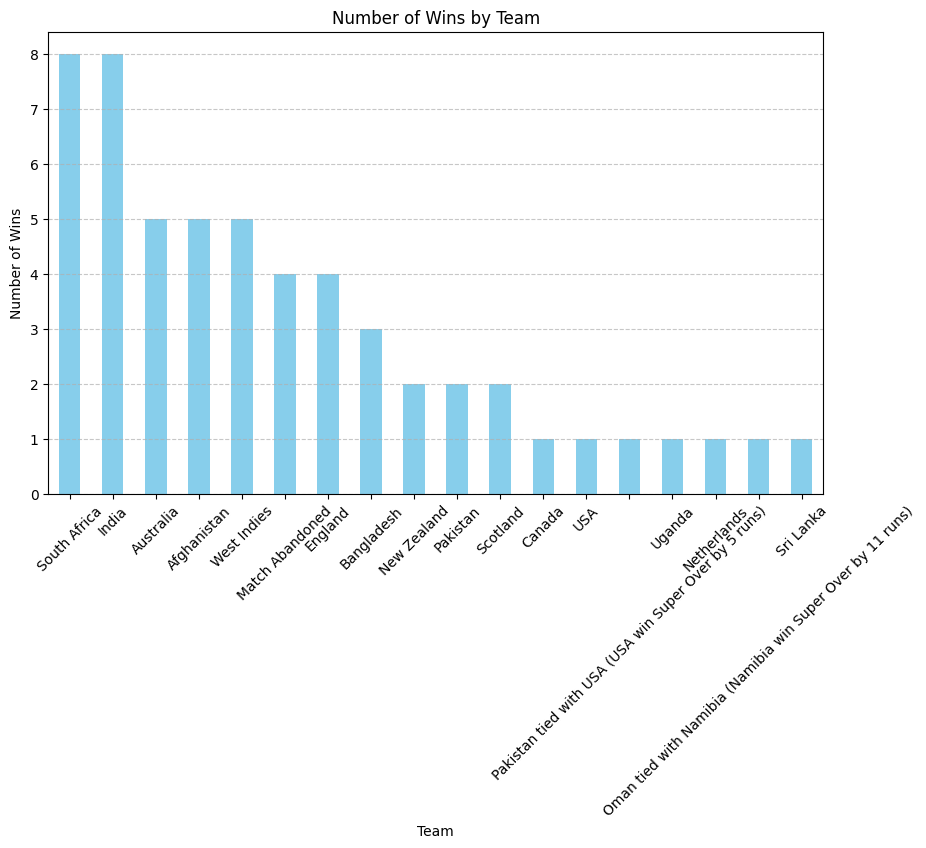

In [ ]:
df['winner'] = df['matchResult'].apply(lambda x: x.split(' beat ')[0])

team_wins = df['winner'].value_counts()

plt.figure(figsize=(10, 6))
team_wins.plot(kind='bar', color='skyblue')
plt.title('Number of Wins by Team')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Enter the team name: IND

All matches involving IND:

               matchNumber teamA_shortName teamB_shortName  \
7                  Match 8             IND             IRE   
18                Match 19             IND             PAK   
24                Match 25             USA             IND   
32                Match 33             IND             CAN   
42   Super Eight - Match 3             AFG             IND   
46   Super Eight - Match 7             IND             BAN   
50  Super Eight - Match 11             AUS             IND   
53          2nd Semi-Final             IND             ENG   
54                   Final              SA             IND   

                          matchResult                 startDate        stage  \
7     India beat Ireland by 8 wickets 2024-06-05 20:00:00+05:30        Group   
18      India beat Pakistan by 6 runs 2024-06-09 20:00:00+05:30        Group   
24        India beat USA by 7 wickets 2024-06-12 20:00:00+05:30        Group   
32   

<ipython-input-18-8279d85d6107>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_matches['outcome'] = team_matches.apply(lambda row: get_outcome(row, team_name), axis=1)


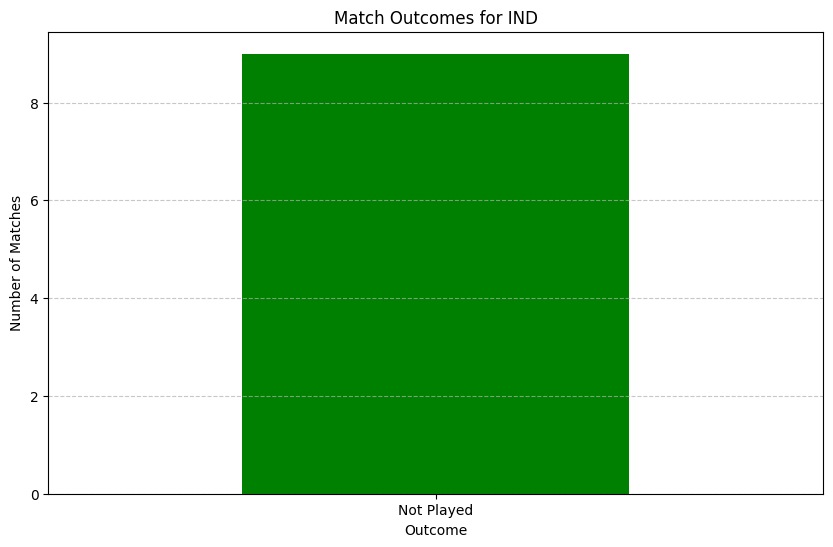

In [ ]:
team_name = input("Enter the team name: ")

# Filter the results of all matches involving the team
team_matches = df[(df['teamA_shortName'] == team_name) | (df['teamB_shortName'] == team_name)]

# Print the results of all matches involving the team
print(f"\nAll matches involving {team_name}:\n")
print(team_matches[['matchNumber', 'teamA_shortName', 'teamB_shortName', 'matchResult', 'startDate', 'stage', 'venue']])

plt.figure(figsize=(10, 6))

# extract match outcomes for plotting
def get_outcome(row, team):
    if team in row['matchResult']:
        if 'beat' in row['matchResult']:
            winner = row['matchResult'].split(' beat ')[0]
            if winner == team:
                return 'Win'
            else:
                return 'Loss'
        else:
            return 'No Result'
    return 'Not Played'

# Apply the function to get match outcomes
team_matches['outcome'] = team_matches.apply(lambda row: get_outcome(row, team_name), axis=1)

outcome_counts = team_matches['outcome'].value_counts()
outcome_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title(f'Match Outcomes for {team_name}')
plt.xlabel('Outcome')
plt.ylabel('Number of Matches')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
def determine_win_type(row):
    if 'by runs' in row['matchResult']:
        return 'By Runs'
    elif 'by wickets' in row['matchResult']:
        return 'By Wickets'
    else:
        return 'Other'

# Apply the function to get the win type
df['winType'] = df['matchResult'].apply(determine_win_type)

# Prompt the user to input a team name
team_name = input("Enter the team name: ").upper()

# Convert team names to uppercase to handle case insensitivity
df['teamA_shortName'] = df['teamA_shortName'].str.upper()
df['teamB_shortName'] = df['teamB_shortName'].str.upper()

# Filter the results of all matches involving the team
team_matches = df[(df['teamA_shortName'] == team_name) | (df['teamB_shortName'] == team_name)]

# Check if there are any matches involving the team
if team_matches.empty:
    print(f"No matches found for the team: {team_name}")
else:
    # Print the results of all matches involving the team
    print(f"\nAll matches involving {team_name}:\n")
    print(team_matches[['matchNumber', 'teamA_shortName', 'teamB_shortName', 'matchResult', 'startDate', 'stage', 'venue', 'winType']])

    # Define a function to extract match outcomes for plotting
    def get_outcome(row, team):
        if team in row['matchResult']:
            if 'beat' in row['matchResult']:
                winner = row['matchResult'].split(' beat ')[0]
                if winner == team:
                    return 'Win'
                else:
                    return 'Loss'
            else:
                return 'No Result'
        return 'Not Played'

    # Apply the function to get match outcomes
    team_matches['outcome'] = team_matches.apply(lambda row: get_outcome(row, team_name), axis=1)

    # Filter only the wins
    team_wins = team_matches[team_matches['outcome'] == 'Win']

    # Count the number of wins by type
    win_type_counts = team_wins['winType'].value_counts()

    # Plot the results
    plt.figure(figsize=(10, 6))
    win_type_counts.plot(kind='bar', color=['blue', 'orange'])
    plt.title(f'Match Outcomes for {team_name} - Batting First vs Bowling First')
    plt.xlabel('Win Type')
    plt.ylabel('Number of Matches')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

TypeError: string indices must be integers

In [ ]:
def determine_win_type(match_result):
    if 'by runs' in match_result:
        return 'By Runs'
    elif 'by wickets' in match_result:
        return 'By Wickets'
    else:
        return 'No Result'

# Apply the function to get the win type
df['winType'] = df['matchResult'].apply(determine_win_type)

# Convert team names to uppercase to handle case insensitivity
df['teamA_shortName'] = df['teamA_shortName'].str.upper()
df['teamB_shortName'] = df['teamB_shortName'].str.upper()

# Prompt the user to input a team name
team_name = input("Enter the team name: ").upper()

# Filter the results of all matches involving the team
team_matches = df[(df['teamA_shortName'] == team_name) | (df['teamB_shortName'] == team_name)]

# Check if there are any matches involving the team
if team_matches.empty:
    print(f"No matches found for the team: {team_name}")
else:
    # Print the results of all matches involving the team
    print(f"\nAll matches involving {team_name}:\n")
    print(team_matches[['matchNumber', 'teamA_shortName', 'teamB_shortName', 'matchResult', 'startDate', 'stage', 'venue', 'winType']])

    # Define a function to extract match outcomes for plotting
    def get_outcome(row, team):
        if team in row['matchResult']:
            if 'beat' in row['matchResult']:
                winner = row['matchResult'].split(' beat ')[0]
                if winner == team:
                    return 'Win'
                else:
                    return 'Loss'
            else:
                return 'No Result'
        return 'Not Played'

    # Apply the function to get match outcomes
    team_matches.loc[:, 'outcome'] = team_matches.apply(lambda row: get_outcome(row, team_name), axis=1)

    # Filter only the wins
    team_wins = team_matches[team_matches['outcome'] == 'Win']

    if not team_wins.empty:
        # Count the number of wins by type
        win_type_counts = team_wins['winType'].value_counts()

        # Plot the results
        plt.figure(figsize=(10, 6))
        win_type_counts.plot(kind='bar', color=['blue', 'orange'])
        plt.title(f'Match Outcomes for {team_name} - Batting First vs Bowling First')
        plt.xlabel('Win Type')
        plt.ylabel('Number of Matches')
        plt.xticks(rotation=0)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
    else:
        print(f"No wins found for the team: {team_name}")

Enter the team name: IND

All matches involving IND:

               matchNumber teamA_shortName teamB_shortName  \
7                  Match 8             IND             IRE   
18                Match 19             IND             PAK   
24                Match 25             USA             IND   
32                Match 33             IND             CAN   
42   Super Eight - Match 3             AFG             IND   
46   Super Eight - Match 7             IND             BAN   
50  Super Eight - Match 11             AUS             IND   
53          2nd Semi-Final             IND             ENG   
54                   Final              SA             IND   

                          matchResult                 startDate        stage  \
7     India beat Ireland by 8 wickets 2024-06-05 20:00:00+05:30        Group   
18      India beat Pakistan by 6 runs 2024-06-09 20:00:00+05:30        Group   
24        India beat USA by 7 wickets 2024-06-12 20:00:00+05:30        Group   
32   

<ipython-input-25-ba20f7287413>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_matches.loc[:, 'outcome'] = team_matches.apply(lambda row: get_outcome(row, team_name), axis=1)
